In [ ]:
# What causes employee attrition? 
#
# This notebook offers my analysis of the "IBM HR Analytics Employee Attrition & Performance" 
# dataset from Kaggle.com
#
# In my analysis, I found the most important features determining employee attrition to be Age, StockOptionLevel, OverTime, and MonthlyIncome.
# I use these features to create an equation that predicts the liklihood that an employee will leave the company.
# 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

# Classifier libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder

#model selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV


# other libraries
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import NearMiss
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from collections import Counter



In [2]:
df=pd.read_csv(r'/Users/nate/Desktop/Projects/Python/Employee_Performance/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Move the reponse variable "Attrition" to the front of the table
front = df['Attrition']
df.drop(labels=['Attrition'], axis=1,inplace = True)
df.insert(0, 'Attrition', front)
df.head()


,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
# Check to see if there are any missing values in our data set
df.isnull().any()

Attrition                   False
Age                         False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [6]:
df.dtypes

Attrition                   object
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
# About 84% of employees stayed while 16% left

attrition_rate = df.Attrition.value_counts() / len(df)
attrition_rate

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# Overview of summary (Attrition V.S. Non-attrition)
#
# On average, those who left the company were younger, paid less, and had less years with the company
#
attrition_Summary = df.groupby('Attrition')
attrition_Summary.mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


In [10]:
# Label encoding
# Attrition and other column variables are object types so we will convert them to int
#
# 

def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)

cat_df=df.select_dtypes(include='object')
cat_df.columns

for col in cat_df.columns:
    transform(col)

df.head() # just to verify.

['No' 'Yes']
['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['Y']
['No' 'Yes']


,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.159205,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Age,-0.159205,1.000000,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
BusinessTravel,0.000074,0.024751,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,-0.056652,0.010661,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,0.063991,-0.031882,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,0.077924,-0.001686,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,-0.031373,0.208034,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,0.026846,-0.040873,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010577,-0.010145,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


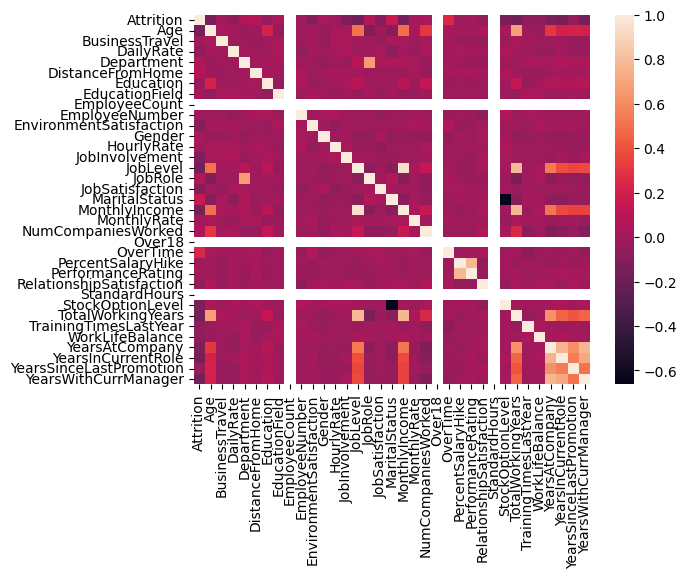

In [11]:
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

In [ ]:
# The following are some instances of correlations as displayed from the correlation matrix


# Strong positive correlations:
#
# 1) Monthly income and job level
# 2) Performance rating and percent salary hike is an obvious correlation to see
# 3) Years at company and years in current role is another obvious one
# 4) As is years at company and years with current manager
# 5) Total working years and job level


# Strong negative correlations:
#
# 1) Stock option level and marital status


# Moderate positive correlations:
#
# 1) Monthly income and age
# 2) Overtime and attrition
# 3) Monthly income and years at company, years in current role, etc.
# 4) Age and years...
# 5) Job level and years...


# Moderate negative correlations:
#
# 1) Attrition and age
# 2) Attrition and job level
# 3) Attrition and monthly income 
# 4) Attrition and years...

In [ ]:
# Statistical test for correlation - One Sample T-Test
#
#
# Let's run a one-sample t-test to check if a sample mean differs from the population mean.
#
# Overtime has the highest correlaton with our dependent variable attrition so let us check to see if the 
# average overtime performed by employees that left the company is different from those that stayed.
#
#
# Hypothesis Testing: Is there significant difference in the means of overtime between employees 
# who left and temployees who stayed?
#
#
# Null Hypothesis: The null hypothesis would be that there is no difference in overtime between employees who 
# left the company and those who did not...

# Alternate Hypothesis: The alternative hypothesis would be that there is a difference in overtime between employees 
# who did leave and those who did not..
#

In [12]:
# Let's compare the means of our employee attrition overtime against the employee population overtime
#emp_population = df['OverTime'].mean()
emp_population = df['OverTime'][df['Attrition'] == 0].mean()
emp_attrition_overtime = df[df['Attrition']==1]['OverTime'].mean()

print( 'The mean overtime for the employee population with no attrition is: ' + str(emp_population))
print( 'The mean overtime for employees that had attrition is: ' + str(emp_attrition_overtime) )

The mean overtime for the employee population with no attrition is: 0.23438767234387672
The mean overtime for employees that had attrition is: 0.5358649789029536


In [13]:
# Conducting the T-Test
#
# Let's see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the
# employee population

import scipy.stats as stats
stats.ttest_1samp(a=  df[df['Attrition']==1]['OverTime'], # Sample of Employee overtime who had attrition
                  popmean = emp_population)  # Employee Who Had No attrition overtime mean

Ttest_1sampResult(statistic=9.286686203330195, pvalue=1.0825135786127084e-17)

In [ ]:
# T-test resulted in a t-statistic value of 9.29 and a p-value of 1.0825e-17

In [14]:
# T-Test Quantile
# If the t-statistic value we calculated above (9.29) is outside the quantiles, then we can reject the null hypothesis

degree_freedom = len(df[df['Attrition']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9700240104025675
The t-distribution right quartile range is: 1.970024010402567


In [ ]:
# Reject the null hypothesis because:
#
# 1) T-Test score is outside the quantiles
# 2) P-value is lower than confidence level of 5%
#
#
# Based on the statistical analysis of a one sample t-test, there seems to be some significant difference 
# between the mean satisfaction of employees who left and the entire employee population. The super 
# low P-value of 1.0825e-17 at a 5% confidence level is a good indicator to reject the null hypothesis.

Text(0, 0.5, 'Employee Count')

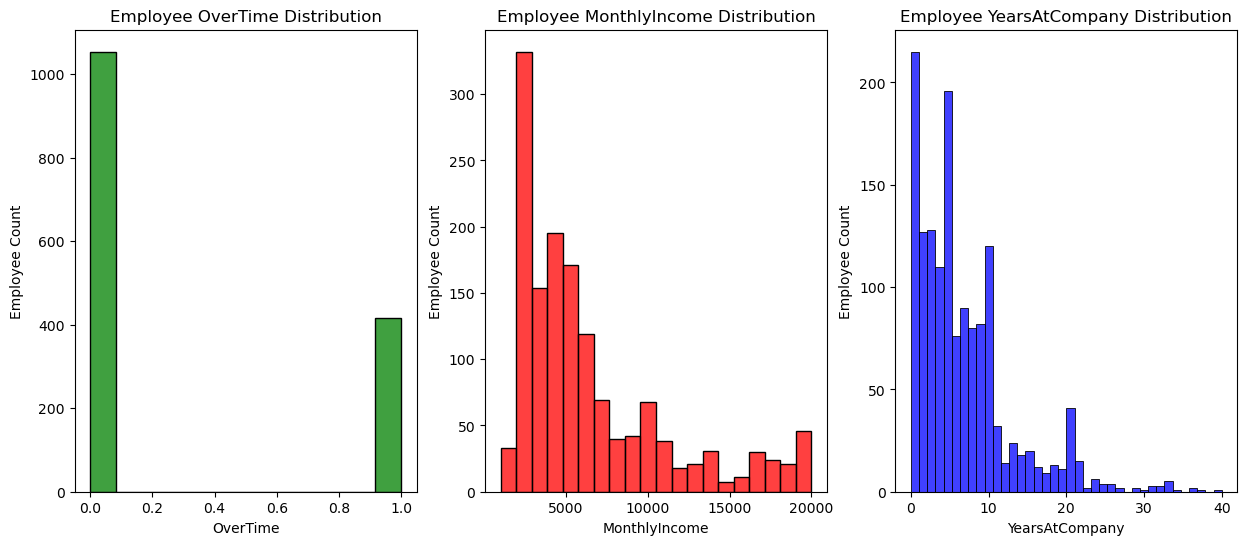

In [15]:
# Distribution plots
# 
# Lets examine OverTime, MonthlyIncome, and Age
#
# Findings:
# > OverTime -- Employees either have no overtime or overtime, there is no in-between (in this dataset)
# > MonthlyIncome -- Most employees have monthly income lower than 5000
# > YearsAtCompany -- Most employees stay less than 10 years; the MonthlyIncome and YearsAtCompany graphs share a
#                       similar distribution 

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Overtime
sns.histplot(df.OverTime, kde=False, color="g", ax=axes[0]).set_title('Employee OverTime Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee MonthlyIncome
sns.histplot(df.MonthlyIncome, kde=False, color="r", ax=axes[1]).set_title('Employee MonthlyIncome Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee YearsAtCompany
sns.histplot(df.YearsAtCompany, kde=False, color="b", ax=axes[2]).set_title('Employee YearsAtCompany Distribution')
axes[2].set_ylabel('Employee Count')


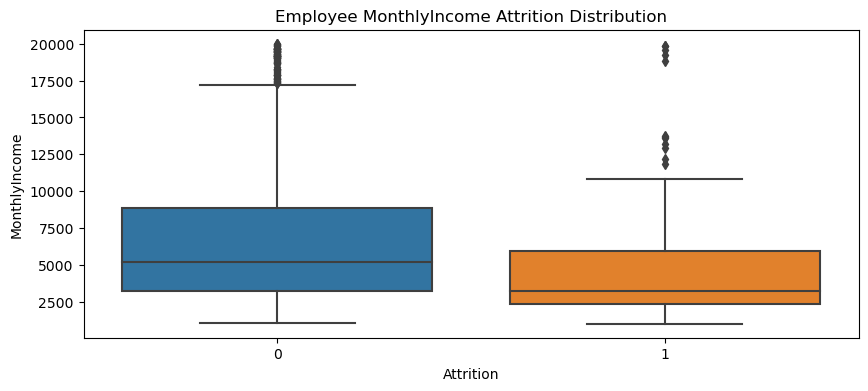

In [16]:
# MonthlyIncome vs Attrition
#

f, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(y="MonthlyIncome", x='Attrition', data=df).set_title('Employee MonthlyIncome Attrition Distribution');

In [ ]:
# Most employees who leave have a lower monthly income than employees who stay

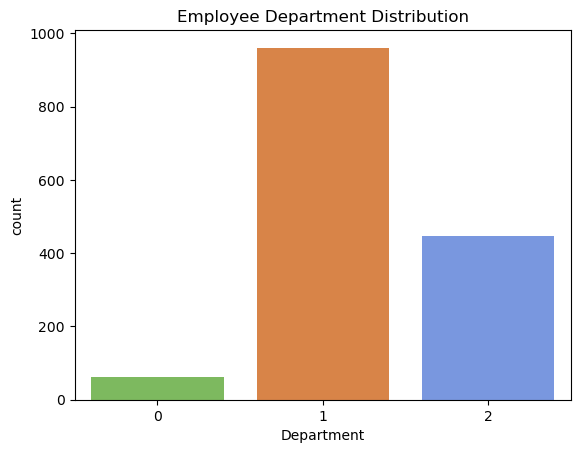

In [17]:
# Department vs Attrition
#
# Summary:
# Most employees are working in and leaving the Research & Development department
# 
# 0 = Human Resources
# 1 = Research & Development 
# 2 = Sales



# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Department', data=df, palette=color_types).set_title('Employee Department Distribution');
 


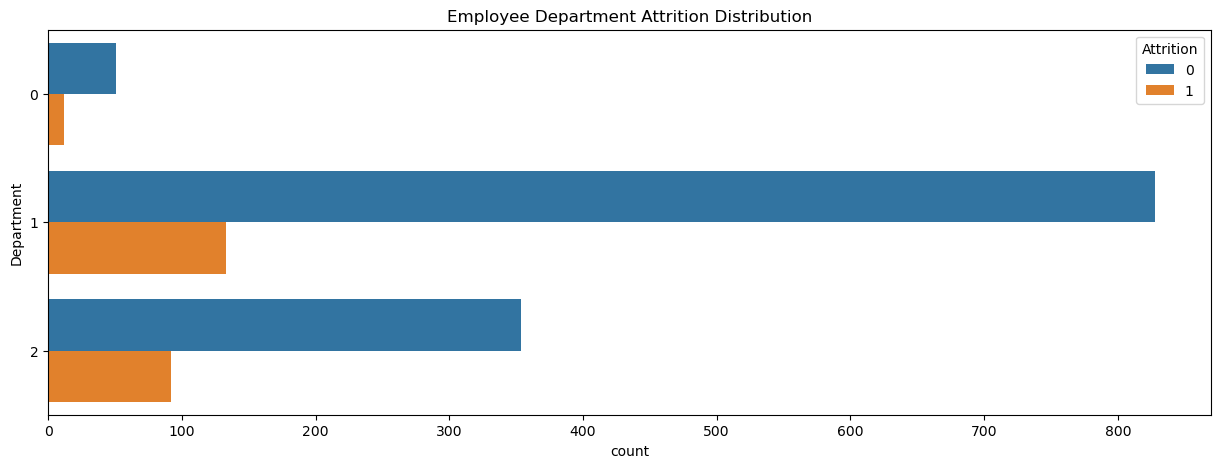

In [18]:
# 
# 0 = No Attrition
# 1 = Attrition
#
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="Department", hue='Attrition', data=df).set_title('Employee Department Attrition Distribution');

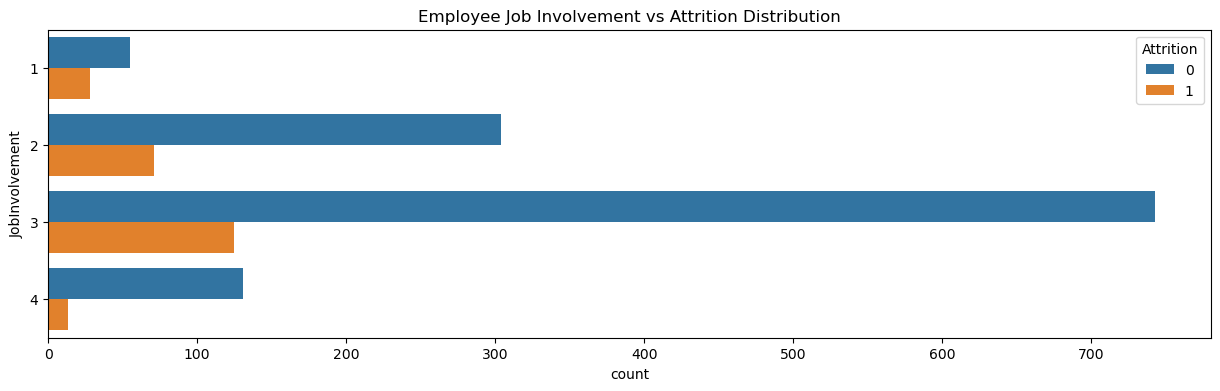

In [19]:
# Attrition vs JobInvolvement
#
# Findings:
# The highest proportion of employees leave who report low job involvement of score 1


f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="JobInvolvement", hue='Attrition', data=df).set_title('Employee Job Involvement vs Attrition Distribution');

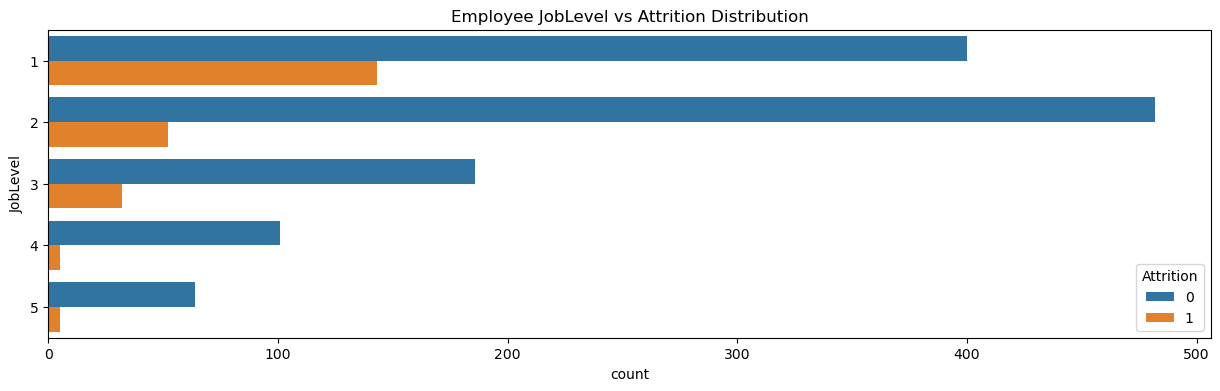

In [20]:
# Attrition vs JobLevel
#
# Findings:
# Lower level employees tend to leave more than higher level employees

f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="JobLevel", hue='Attrition', data=df).set_title('Employee JobLevel vs Attrition Distribution');

[Text(0, 0.5, 'Percent')]

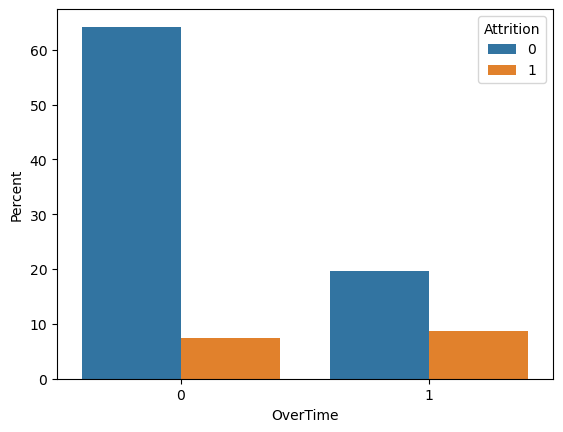

In [21]:
# Attrition vs OverTime
#
# Findings:
# Distribution of attrition is comparable for employees with or without overtime

ax = sns.barplot(x="OverTime", y="OverTime", hue="Attrition", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31'),
  Text(31, 0, '32'),
  Text(32, 0, '33'),
  Text(33, 0, '34'),
  Text(34, 0, '36'),
  Text(35, 0, '37'),
  Text(36, 0, '40')])

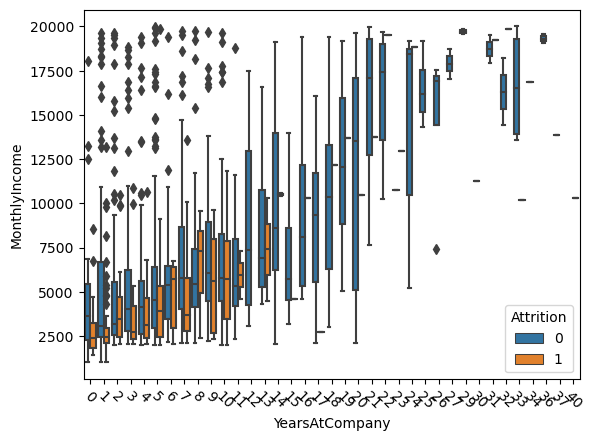

In [22]:
# MonthlyIncome vs YearsAtCompany [BOXPLOT]
#
# Findings:
# Most employees leave before 10 years with a company
# Monthly income follows a similar trend for both employees who leave or stay with the company

sns.boxplot(x="YearsAtCompany", y="MonthlyIncome", hue="Attrition", data=df)

# Rotate x-labels
plt.xticks(rotation=-45)

<AxesSubplot:xlabel='PerformanceRating', ylabel='PercentSalaryHike'>

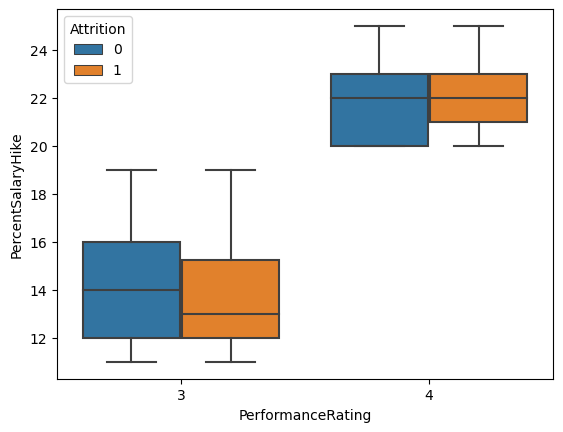

In [23]:
# PerformanceRating vs PercentSalaryHike
#
# Findings:
# Employees w/ a lower performance rating that leave generally receive a lower percent salary hike
# Salary does not appear to be a factor for why employees that receive high performance ratings leave
#

sns.boxplot(x="PerformanceRating", y="PercentSalaryHike", hue="Attrition", data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31'),
  Text(31, 0, '32'),
  Text(32, 0, '33'),
  Text(33, 0, '34'),
  Text(34, 0, '36'),
  Text(35, 0, '37'),
  Text(36, 0, '40')])

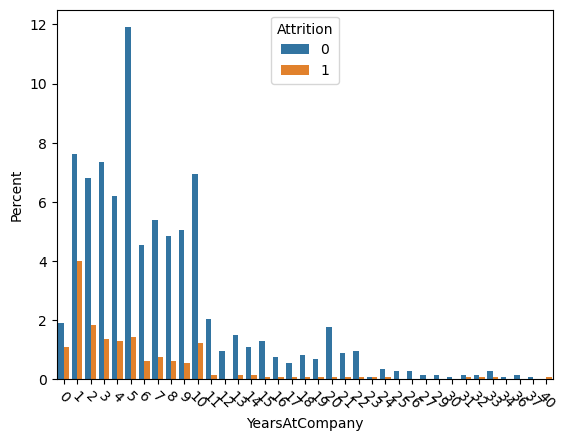

In [24]:
# YearsAtCompany vs Attrition
#
# Findings:
# > Over half of the employees with 0 or 1 years leave
# > Emolyees w/ 1 year have the highest attrition rate
#

ax = sns.barplot(x="YearsAtCompany", y="YearsAtCompany", hue="Attrition", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

# Rotate x-labels
plt.xticks(rotation=-45)

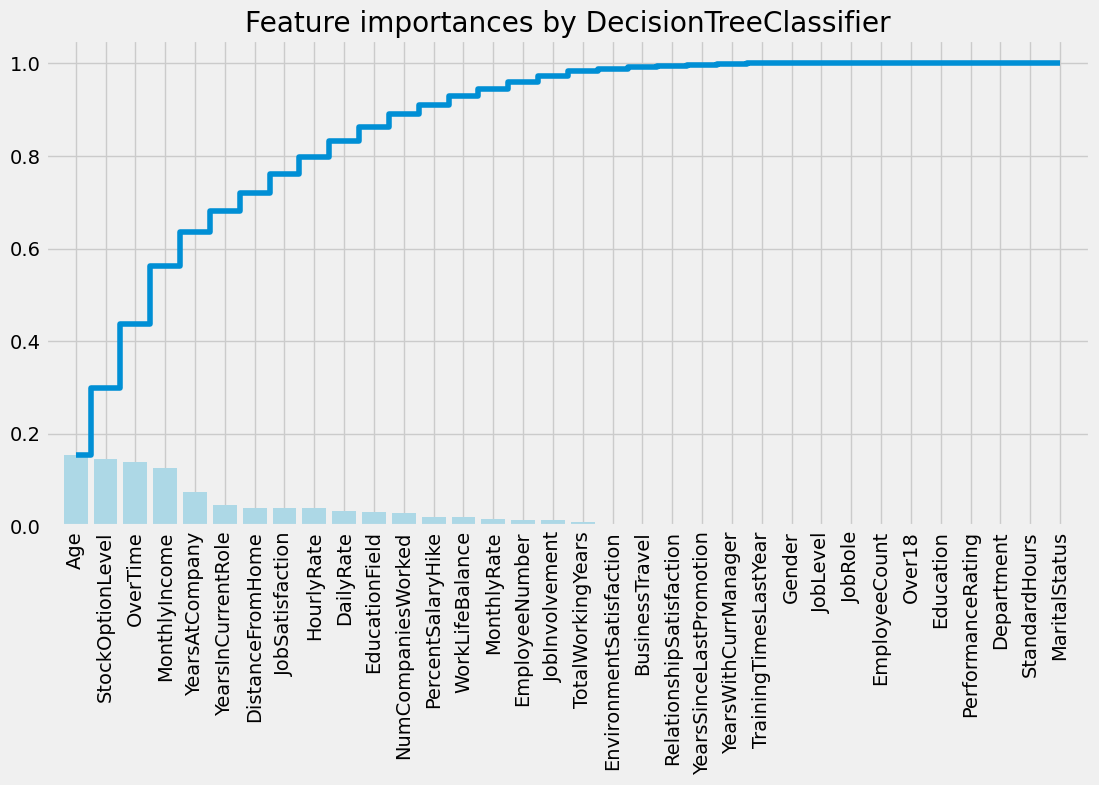

In [25]:
# FEATURE IMPORTNACE #

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Create train and test splits
target_name = 'Attrition'
X = df.drop('Attrition', axis=1)


y=df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['Attrition'],axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [26]:
# Logisitic Regression Analysis #

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
#Read the analytics csv file and store our dataset into a dataframe called "df"
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

# Create an intercept term for the logistic regression equation
df['int'] = 1
indep_var = ['Age', 'StockOptionLevel', 'OverTime', 'MonthlyIncome', 'int', 'Attrition']
df = df[indep_var]

# Create train and test splits
target_name = 'Attrition'
X = df.drop('Attrition', axis=1)

y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

X_train.head()


,Age,StockOptionLevel,OverTime,MonthlyIncome,int
639,49,1,0,3580,1
1019,36,2,0,5647,1
1389,31,0,0,5003,1
1392,35,0,1,5204,1
1347,36,0,0,3886,1


In [27]:
# With the elimination of the other variables, I’ll be using the four most important features to create our 
# model: Age, StockOptionLevel, OverTime, and MonthlyIncome.
#
# Following overall equation was developed:

# Employee Attrition Score = Age(-0.034058) + StockOptionLevel(-0.533267) + OverTime*(1.348649) + MonthlyIncome(-0.000101) - 0.009611
#

import statsmodels.api as sm
iv = ['Age','StockOptionLevel','OverTime','MonthlyIncome', 'int']
logReg = sm.Logit(y_train, X_train[iv])
answer = logReg.fit()

answer.summary
answer.params

Optimization terminated successfully.
         Current function value: 0.384432
         Iterations 7


Age                -0.034058
StockOptionLevel   -0.533267
OverTime            1.348649
MonthlyIncome      -0.000101
int                -0.009611
dtype: float64

In [ ]:
# The values above are the coefficient assigned to each independent variable. 
# The constant -0.009611 represents the effect of all uncontrollable variables.

In [28]:
# Create function to compute coefficients
coef = answer.params
def y (coef, Age, StockOptionLevel, OverTime, MonthlyIncome) : 
    return coef[4] + coef[0]*Age + coef[1]*StockOptionLevel + coef[2]*OverTime + coef[3]*MonthlyIncome

import numpy as np

# An Employee with 25 Age, 1 StockOptionLevel, 0 OverTime, and 3000 MonthlyIncome has a 15% chance of attrition
y1 = y(coef, 25, 1, 0, 3000)
p = np.exp(y1) / (1+np.exp(y1))
p


0.15470880554868732

In [29]:
# An Employee with 25 Age, 0 StockOptionLevel, 0 OverTime, and 2200 MonthlyIncome has a 25% chance of attrition
y1 = y(coef, 25, 0, 0, 2200)
p = np.exp(y1) / (1+np.exp(y1))
p

0.25277757094419673

In [ ]:
# Interpretation of Score #

# If you were to use these employee values into the equation:

# Age: 25
# StockOptionLevel: 1
# OverTime: 0
# MonthlyIncome: 3000
# You would get:

# Employee Attrition Score = (25)(-0.034058) + (1)(-0.533267) + (0)(1.348649) + (3000)(-0.000101) - 0.009611 = 0.15470880554868732 = 15%

In [30]:
# Using other models

# The base rate accuracy for this data set, when classifying everything as 0's, would be 84% because 84% of the dataset 
# are labeled as 0's (employees not leaving the company).

# False Positives (Type I Error): You predict that the employee will leave, but do not

# False Negatives (Type II Error): You predict that the employee will not leave, but does leave

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

# Create train and test splits
target_name = 'Attrition'
X = df.drop('Attrition', axis=1)
#robust_scaler = RobustScaler()
#X = robust_scaler.fit_transform(X)
y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

# Check accuracy of base rate model
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))


Base rate accuracy is 0.84


In [31]:
# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.85


In [32]:
# Using 10 fold Cross-Validation to train our Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.741 (0.057)


In [33]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)))

# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))

# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))

# Ada Boost
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))

---Base Model---
Base Rate AUC = 0.50
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       185
           1       0.00      0.00      0.00        36

    accuracy                           0.84       221
   macro avg       0.42      0.50      0.46       221
weighted avg       0.70      0.84      0.76       221



 ---Logistic Model---
Logistic AUC = 0.72
              precision    recall  f1-score   support

           0       0.93      0.72      0.81       185
           1       0.33      0.72      0.46        36

    accuracy                           0.72       221
   macro avg       0.63      0.72      0.63       221
weighted avg       0.83      0.72      0.75       221



 ---Decision Tree Model---
Decision Tree AUC = 0.58
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       185
           1       0.23      0.44      0.30        36

    accuracy                           0.67   

/Users/nate/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nate/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nate/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




 ---Random Forest Model---
Random Forest AUC = 0.67
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       185
           1       0.42      0.47      0.45        36

    accuracy                           0.81       221
   macro avg       0.66      0.67      0.67       221
weighted avg       0.82      0.81      0.81       221



 ---AdaBoost Model---
AdaBoost AUC = 0.58
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       185
           1       0.67      0.17      0.27        36

    accuracy                           0.85       221
   macro avg       0.76      0.58      0.59       221
weighted avg       0.83      0.85      0.81       221



In [ ]:
# The best model performance out of the four (Decision Tree Model, AdaBoost Model, Logistic Regression Model, Random Forest Model) 
# was Logistic Regression!

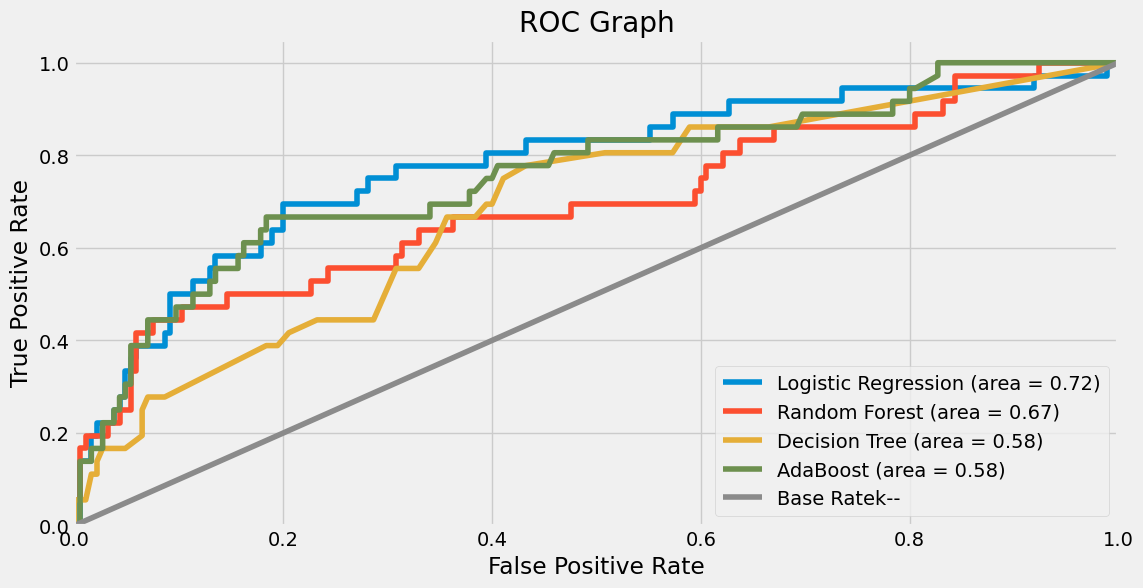

In [34]:
# ROC Graph

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# INTERPRETING THE DATA #

# 1) Employees w/ low job involvement have the highest proportion of attrition.
# 2) Emolyees that have worked 1 year at the company have the highest attrition rate.
# 3) Employees w/ lower performance ratings are more likely to leave if they receive a low percent salary hike.
# 4) Employee Age is the highest indicator for attrition.
# 5) Employee Age, StockOptionLevel, OverTime, and MonthlyIncome were the four biggest factors in determining attrition.

In [ ]:
# PROPOSED SOLUTIONS #

# A) New, younger employees should be given priority regarding job involvement. They need to be kept
#   engaged with their work and encouraged to take on more responsibilities as they advance.
#
# B) We can rank employees by their probability of leaving, then allocate a limited incentive budget 
# to the highest probability instances.
#
# C) Develop learning programs for managers. Then use analytics to gauge their performance and measure progress.
